# Problem Statement

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.

They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

### Dataset Definition

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

Dataset link: [Walmart_data.csv](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094)

| Column Name               | Description                           |
| :----------------         | :------------------------------------ |
| User_ID                   | User ID                               |
| Product_ID                | Product ID                            |
| Gender                    | Sex of User                           |
| Age                       | Age in bins                           |
| Occupation                | Occupation(Masked)                    |
| City_Category             | Category of the City (A,B,C)          |
| Stay_In_Current_City_Years| Number of years stay in current city  |
| Marital_Status            | Marital Status                        |
| ProductCategory           | Product Category (Masked)             |
| Purchase                  | Purchase Amount                       |

## Methodology

1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.

2. Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)

3. Do some data exploration steps like:
   - Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
   - Inference after computing the average female and male expenses.
   - Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.

4. Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
   - The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.

5. Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?

6. Perform the same activity for Married vs Unmarried and Age
   - For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.

7. Give recommendations and action items to Walmart.

# Exploratory Analysis

## Import statements

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import math as mt
import random as rd
import time as tm

## Data Loading

In [67]:
file_link = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094"

raw_data = pd.read_csv(file_link)
raw_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [68]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [69]:
raw_data.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


### Observations:
1. There are 5.5 lakh records of transaction data
2. User ID and Product ID columns identify the product purchased by a user in the current transaction
3. User ID is of int data type and should be changed to string
4. There does not seem to be an unique identifier for each transaction
5. There are 3631 unique products
6. There are not any null values in the data
7. The category columns such as Occupation, City_Category, Marital_Status, Product_Category are of int data type and are masked so need to change to category type

### Next Steps:
1. Convert User ID to type string (so no numerical operations may be performed)
2. Create a unique id for each transaciton using the row number and cast it as string
3. Convert the masked int category columns to type category with appropriate prefix
4. Check for outliers in the numerical and categorical columns
5. Check the different types of categories and their frequencies in each categorical column

## Data Cleaning

1. Changing Data Types
2. Checking Missing values
3. Outlier Detection

In [70]:
clean_data = raw_data.reset_index().copy()

clean_data['User_ID'] = clean_data['User_ID'].astype('str')
clean_data['Product_ID'] = clean_data['Product_ID'].astype('str')
clean_data.rename(columns={'index': 'Transaction_ID'}, inplace=True, errors='ignore')
clean_data['Transaction_ID'] = clean_data['Transaction_ID'].astype('str')

clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Transaction_ID              550068 non-null  object
 1   User_ID                     550068 non-null  object
 2   Product_ID                  550068 non-null  object
 3   Gender                      550068 non-null  object
 4   Age                         550068 non-null  object
 5   Occupation                  550068 non-null  int64 
 6   City_Category               550068 non-null  object
 7   Stay_In_Current_City_Years  550068 non-null  object
 8   Marital_Status              550068 non-null  int64 
 9   Product_Category            550068 non-null  int64 
 10  Purchase                    550068 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 46.2+ MB


In [71]:
clean_data.isna().sum()

Transaction_ID                0
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [72]:
value_counts = pd.DataFrame()

columns_to_check = [
    'Gender', 'Age', 'Occupation',
    'City_Category', 'Stay_In_Current_City_Years',
    'Marital_Status', 'Product_Category'
    ]

for column in columns_to_check:
    column_value_counts = (
        clean_data[column]
        .value_counts()
        .reset_index()
        .rename(columns={column:'value'})
        )
    column_value_counts['pct'] = column_value_counts['count'] * 100 / clean_data.shape[0]
    column_value_counts['column'] = column
    value_counts = pd.concat([value_counts, column_value_counts], ignore_index=True)

value_counts[['column', 'value', 'count', 'pct']]

,column,value,count,pct
0,Gender,M,414259,75.310507
1,Gender,F,135809,24.689493
2,Age,26-35,219587,39.919974
3,Age,36-45,110013,19.999891
4,Age,18-25,99660,18.117760
5,Age,46-50,45701,8.308246
6,Age,51-55,38501,6.999316
7,Age,55+,21504,3.909335
8,Age,0-17,15102,2.745479
9,Occupation,4,72308,13.145284


*Assumption: Marital Status 1 means married and 0 means unmarried*

In [73]:
columns_to_convert = {
    'Gender', 'Age','Occupation',
    'Marital_Status', 'Product_Category',
    'City_Category', 'Stay_In_Current_City_Years'
}

for column in columns_to_convert:
    if column in {'Marital_Status'}:
        clean_data[column] = clean_data[column].apply(lambda x: 'Married' if x == 1 else 'Unmarried')
    elif column in {'Product_Category', 'Occupation'}:
        clean_data[column] = clean_data[column].apply(lambda x: f'{column}_{str(x)}')
    clean_data[column] = clean_data[column].astype('category')

clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Transaction_ID              550068 non-null  object  
 1   User_ID                     550068 non-null  object  
 2   Product_ID                  550068 non-null  object  
 3   Gender                      550068 non-null  category
 4   Age                         550068 non-null  category
 5   Occupation                  550068 non-null  category
 6   City_Category               550068 non-null  category
 7   Stay_In_Current_City_Years  550068 non-null  category
 8   Marital_Status              550068 non-null  category
 9   Product_Category            550068 non-null  category
 10  Purchase                    550068 non-null  int64   
dtypes: category(7), int64(1), object(3)
memory usage: 20.5+ MB


In [74]:
clean_data.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [75]:
clean_data.describe(include='category')

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068
unique,2,7,21,3,5,2,20
top,M,26-35,Occupation_4,B,1,Unmarried,Product_Category_5
freq,414259,219587,72308,231173,193821,324731,150933


<Axes: ylabel='Purchase'>

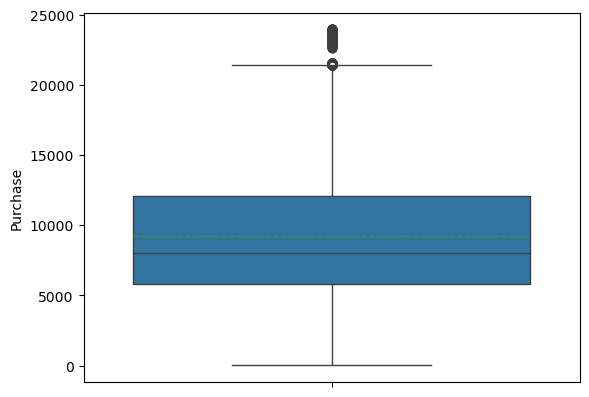

In [76]:
sns.boxplot(y=clean_data['Purchase'], meanline=True, showmeans=True)

In [77]:
iqr = clean_data['Purchase'].quantile(0.75) - clean_data['Purchase'].quantile(0.25)
lower_bound = clean_data['Purchase'].quantile(0.25) - 1.5 * iqr
upper_bound = clean_data['Purchase'].quantile(0.75) + 1.5 * iqr

total_count = clean_data.shape[0]
lower_count = clean_data[clean_data['Purchase'] < lower_bound].shape[0]
upper_count = clean_data[clean_data['Purchase'] > upper_bound].shape[0]
inner_count = total_count - lower_count - upper_count

outlier_distribution = pd.DataFrame({
    'Bound': [f'< {lower_bound}', f'{lower_bound} - {upper_bound}', f'> {upper_bound}'],
    'Count': [lower_count, inner_count, upper_count],
    'Percentage': [lower_count*100/total_count, inner_count*100/total_count, upper_count*100/total_count]
    }
)
outlier_distribution

,Bound,Count,Percentage
0,< -3523.5,0,0.000000
1,-3523.5 - 21400.5,547391,99.513333
2,> 21400.5,2677,0.486667


<Axes: xlabel='Purchase', ylabel='Count'>

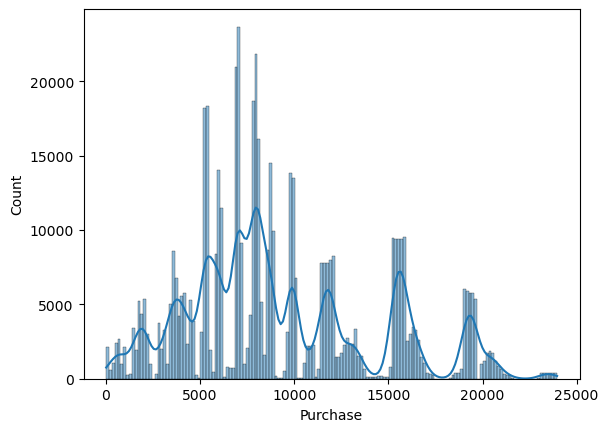

In [78]:
sns.histplot(clean_data['Purchase'], kde=True)

In [79]:
clean_data['Purchase'].mean(), clean_data['Purchase'].median()

(9263.968712959126, 8047.0)

### Observations:

1. There are no missing values in the data as confirmed earlier
2. All the categorical variables have a significant size of samples except for occupation 8 and product category 9 which have less than 1% of samples, since there will not be much analysis of these columns for the current problem statement, it can be ignored
3. There are 0.5% outliers in the purchase amount column which are above upper limit of 21400 but are still less than 25000, hence there is no need to remove these outliers
4. The mean purchase amount is greater than the median which means the distribution is right skewed as confirmed by the hist plot
5. The product category and occupation columns are masked with each containing around 20 unique values which will make it hard to analyse since we cannot bin it or infer business insight directly from it, hence these columns can be dropped from here including the product id column

### Next Steps:

1. Remove the outliers based on the purchase column
2. Drop the product category and occupation columns
3. Perform univariate exploratory analysis of all columns
4. Perform bivariate exploratory analysis of all columns 

In [80]:
analysis_data = (
    clean_data
    .drop(columns=['Occupation', 'Product_Category', 'Product_ID'])
    )
analysis_data.head()

,Transaction_ID,User_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,0,1000001,F,0-17,A,2,Unmarried,8370
1,1,1000001,F,0-17,A,2,Unmarried,15200
2,2,1000001,F,0-17,A,2,Unmarried,1422
3,3,1000001,F,0-17,A,2,Unmarried,1057
4,4,1000002,M,55+,C,4+,Unmarried,7969


## Univariate Analysis

**Types of columns:**

| Categorical               | ID Columns    | Numerical |
| :------------------------ | :------------ | :-------- |
| Gender                    | Transaction_ID| Purchase  |
| Age                       | User_ID       |           |
| City_Category             |               |           |
| Stay_In_Current_City_Years|               |           |
| Marital_Status            |               |           |

In [81]:
id_columns = ['User_ID', 'Transaction_ID']
categorical_columns = analysis_data.select_dtypes(include='category').columns.tolist()
numerical_columns = analysis_data.select_dtypes(include='number').columns.tolist()

categorical_columns, numerical_columns

(['Gender',
  'Age',
  'City_Category',
  'Stay_In_Current_City_Years',
  'Marital_Status'],
 ['Purchase'])

*For numerical variables*

| Numerical | Metric        | Visualisation |
| :-------- | :------------ | :--------     |
| Purchase  | Distribution  | Box Plot      |
|           |               | Hist Plot     |

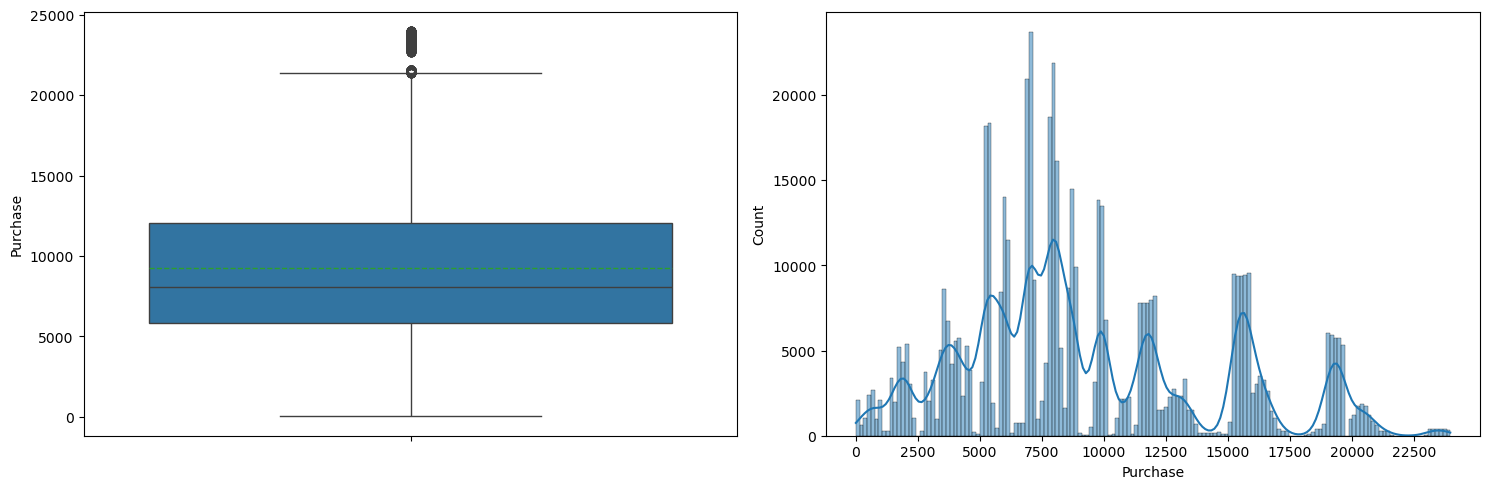

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data= analysis_data, y= 'Purchase', meanline= True, showmeans= True, ax= axes[0])
sns.histplot(data= analysis_data, x= 'Purchase', kde= True, ax= axes[1])

axes[1].set_xticks(range(0,25000,2500))
plt.tight_layout()
plt.show()

In [83]:
bins = [0, 1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000]
labels = [f'{bins[i]} - {bins[i+1]}' for i in range(len(bins)-1)]

analysis_data['Purchase_Bucket'] = pd.cut(analysis_data['Purchase'], bins= bins, labels= labels, right= False)

numerical_bucketed_columns = ['Purchase_Bucket']

In [84]:
def get_difference(left, right, mode= 'relative'):
    if mode == 'absolute':
        return left - right
    if mode == 'relative':
        return (left - right)/right

get_difference(analysis_data['Purchase'].mean(), analysis_data['Purchase'].median())

0.1512325976089382

### Observations:
- The mean purchase amount per transaction is 15% more than median amount, which indicates a right skew in the purchase amount distribution
- The purchase amount distribution does not seem to be a normal distribution, a normality check is required before selecting a test statistic for any subsequent hypothesis testing
- The transactions seems to cluster around ranges of purchase amount, which may be due to prices being discounted down from a round figure

*For categorical variables*

| Category                  | Metric                                | Visualisation |
| :------------------------ | :------------                         | :--------     |
| Gender                    | % Customers                           | Column Chart  |
| Age                       | % Transactions                        |               |
| City_Category             | % Revenue                             |               |
| Stay_In_Current_City_Years| # Transaction per User                |               |
| Marital_Status            | Avg Purchase Amount per Transaction   |               |
| Purchase Amount Bucket    | Avg Purchase Amount per User          |               |


In [85]:
base_aggs = {
    '# Customer': ('User_ID', 'nunique'),
    '# Transaction': ('Transaction_ID', 'count'),
    '$ Revenue': ('Purchase', 'sum')
}

custom_aggs = {
    '%': {'# Customer', '# Transaction', '$ Revenue'},
    'Avg.': {
        '# Transaction': ['# Customer'],
        '$ Revenue': ['# Customer', '# Transaction']
    }
}


In [86]:
def get_size(collection):
    if type(collection) in {str, int, float}:
        return 1
    elif type(collection) in {list, set, dict}:
        n = 0
        collections = collection.values() if type(collection) == dict else collection
        for sub_collection in collections:
            n += get_size(sub_collection)
        return n
    else:
        return 0

def remove_agg_prefixes(name, prefixes, trim= True):
    for prefix in prefixes:
        name = name.replace(prefix, '')
    
    name = name.strip()

    return name


def get_agg_data(data, groupby_coulmns, base_aggs, custom_aggs, include= 'custom', ret_agg_names= False):
    base_agg_data = data.groupby(groupby_coulmns, observed= True).agg(**base_aggs)
    base_agg_names = list(base_aggs.keys())
    if include == 'base':
        if ret_agg_names:
            return base_agg_data.reset_index(), base_agg_names
        return base_agg_data.reset_index()

    custom_agg_names = []
    agg_data = base_agg_data.copy()
    for agg_type, agg_columns in custom_aggs.items():
        if agg_type == '%':
            for column in agg_columns:
                new_column = remove_agg_prefixes(column, ['#', '$'])
                agg_data[f'% {new_column}'] = agg_data[column] * 100 / agg_data[column].sum()
                custom_agg_names.append(f'% {new_column}')
        elif agg_type == 'Avg.':
            for numerator, denominators in agg_columns.items():
                new_numerator = remove_agg_prefixes(numerator, ['#', '$'])
                for denominator in denominators:
                    new_denominator = remove_agg_prefixes(denominator, ['#', '$'])
                    agg_data[f'Avg. {new_numerator} per {new_denominator}'] = agg_data[numerator] / agg_data[denominator]
                    custom_agg_names.append(f'Avg. {new_numerator} per {new_denominator}')
    
    if include == 'both':
        if ret_agg_names:
            return agg_data.reset_index(), base_agg_names + custom_agg_names
        return agg_data.reset_index()

    if ret_agg_names:
        return agg_data.drop(columns= base_agg_data.columns.tolist()).reset_index(), custom_agg_names
    return agg_data.drop(columns= base_agg_data.columns.tolist()).reset_index()

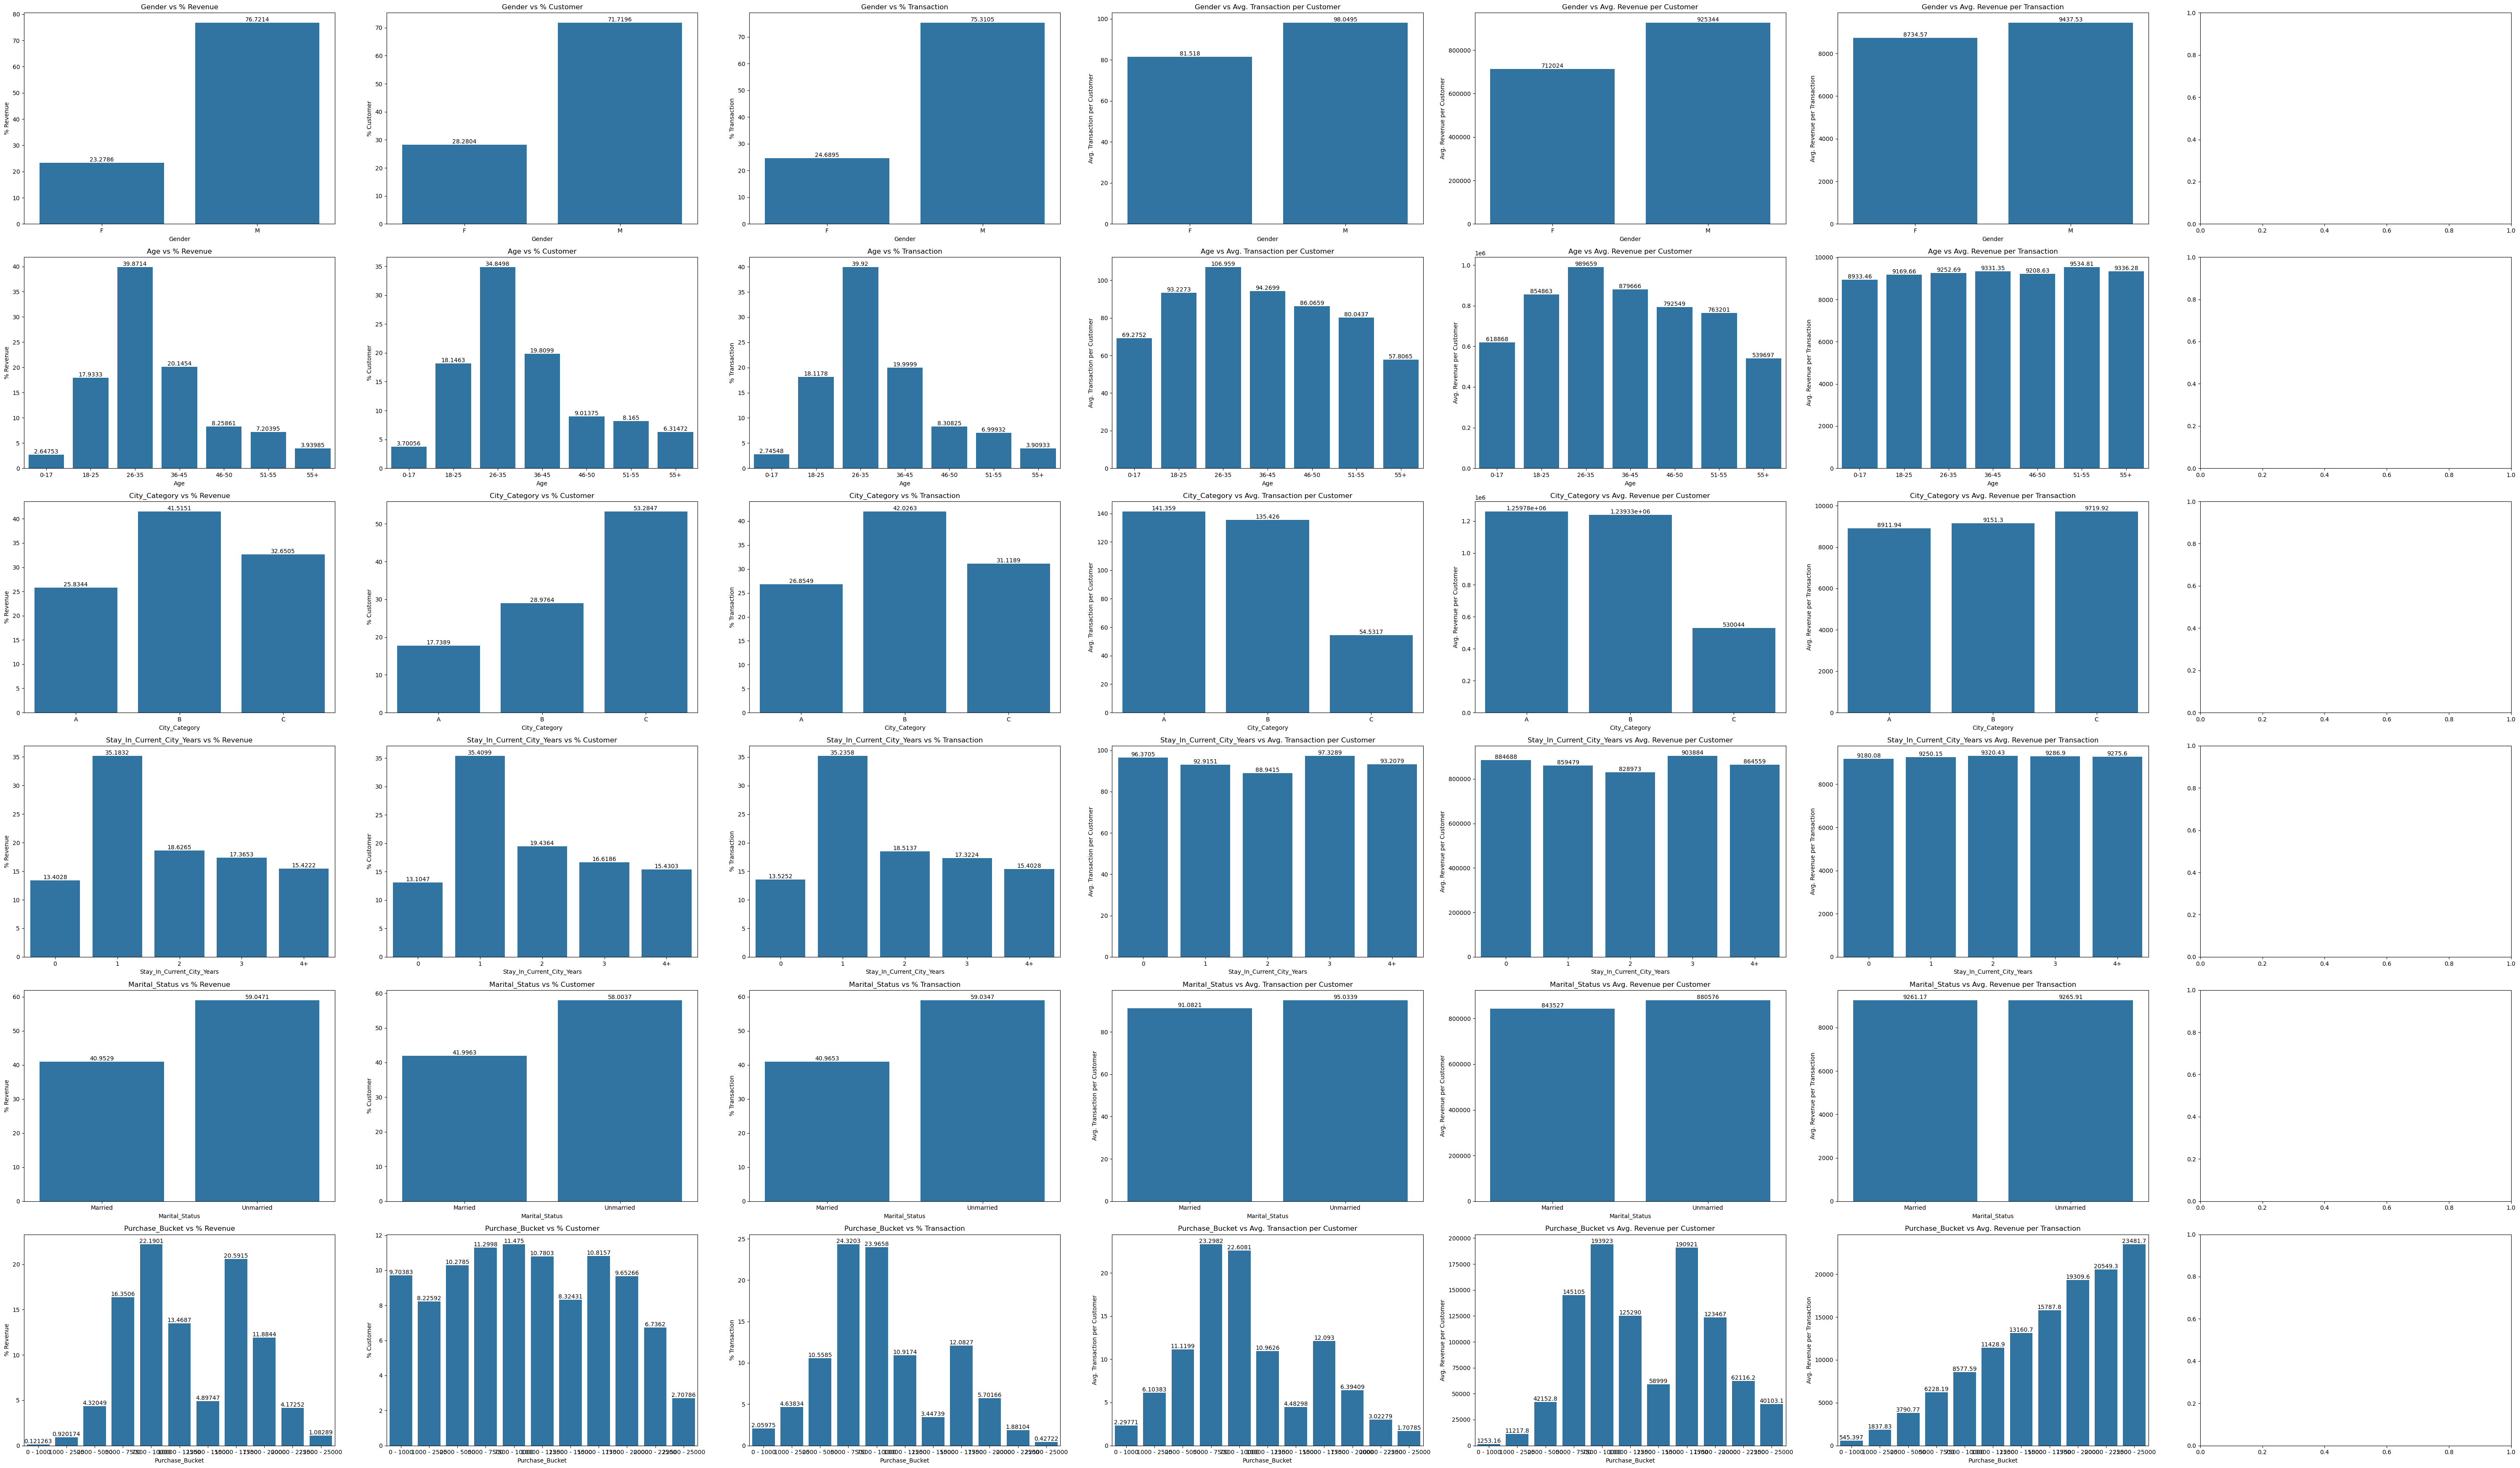

In [87]:
r, c = get_size(categorical_columns + numerical_bucketed_columns), get_size(custom_aggs) + 1

fig, axes = plt.subplots(r, c, figsize=(r*10, c*5))

for i, column in enumerate(categorical_columns + numerical_bucketed_columns):
    agg_data, agg_columns = get_agg_data(analysis_data, column, base_aggs, custom_aggs, ret_agg_names= True)
    for j, agg_column in enumerate(agg_columns):
        sns.barplot(data=agg_data, x=column, y=agg_column, ax=axes[i][j])
        axes[i][j].set_title(f'{column} vs {agg_column}')
        axes[i][j].set_xlabel(column)
        axes[i][j].set_ylabel(agg_column)
        axes[i][j].bar_label(axes[i][j].containers[0])

# for i in range(r):
#     fig.delaxes(axes[i][c-1])

plt.tight_layout()
plt.show()

In [ ]:
print(
    get_difference(
        analysis_data[analysis_data['Gender']=='M']['Purchase'].mean(),
        analysis_data[analysis_data['Gender']=='F']['Purchase'].mean()
    )
)

print(get_difference(98.045, 81.518))

print(get_difference(925.344, 712.024))

print(get_difference(0.53, 1.26))

print(get_difference(9719, 9151))

print(get_difference(54.5, 135.4))

print(get_difference(8986, 9591))

0.08048027735060238
0.2027404990308889
0.299596642809793
-0.5793650793650793
0.06206971915637635
-0.5974889217134417
-0.06307997080596392


### Observations:

- Gender:
  - 72% of purchasing customers are male and 28% customers are female
  - The same is reflected in transaction and revenue which is distributed as 75% male and 25% female
  - The male customers made 98 transactions on average which is 20% more than 81 transactions made by female customers
  - Average revenue per customer is 925K for males which is 30% more than 712K for females
  - Average order value is 9.5K for males which is 8% more than 8.7K for females
  - The metrics seems to be high for males compared to females, need to test significance of the same
  - It is also possible that only a few customers are generating most of the revenue, need to check revenue distribution as the user level

- Age:
  - 40% of customers are in the age range of 26-35 while 20% in 36-45 and 18% in 18-25, a total of 78% of customers are in the age range 18-45
  - The same is the case for revenue contribution and transaction volume across the given age ranges, which can indicate that the revenue may be uniformly distributed across customers atleast across age ranges
  - The average revenue per user and the average no. of transactions per user seem to be ranked similary with age ranges (26-35, 36-45, 18-25) ranking at the top and age ranges (0-17 and 55+) ranking at the bottom, need to check the significance for the same
  - The average order value seems to be similar across the given age ranges, need to check significance of the same
- Marital Status
  - 58% of customers are unmarried and 42% of customers are married
  - The transaction count and revenue are distributed in the same way with 59% from unmarried and 41% from married
  - The average revenue per user and average order value seem to be similar for married and unmarried customers, need to check the same
- City Category
  - 53% of the customers are from City C which is the majority compared to other two cities which have 29% and 18% from City B and City C respectively
  - Unlike age, gender and marital status the transaction volume and revenue is not distributed similar to the no of customers, with City B contributing 41% of revenue/transaction and then City C with 31% of revenue/transaction
  - The average revenue per customer across city seems to also behave unlike age, gender and marital status, with City A and City B being similar at 1.26M (1.6% more than) and 1.24M while City C is 58% low at 530K revenue per user. The same is reflected with average transaciton volume per customer.
  - The average order value looks similar across cities with City C leading by a small margin of 6%. Need to check significance of the same.
  - Need to also check the distribution average order value and total revenue at user level across city, age, gender and marital status

### Next Steps:
1. Check the customer level distribution of average order value (avg revenue per transaction) and total revenue across city, age, gender and marital status
2. Test the hypotheses that average order value is same across gender, age, marital status and city

In [89]:
user_base_aggs = {
    '# Transaction': ('Transaction_ID', 'count'),
    '$ Revenue': ('Purchase', 'sum')
}

user_custom_aggs = {
    'Avg.': {
        '$ Revenue': ['# Transaction']
    }
}

user_agg_data, user_agg_columns = get_agg_data(analysis_data, ['User_ID'] + categorical_columns, user_base_aggs, user_custom_aggs, include= 'both', ret_agg_names= True)

user_agg_data.head()

,User_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,# Transaction,$ Revenue,Avg. Revenue per Transaction
0,1000001,F,0-17,A,2,Unmarried,35,334093,9545.514286
1,1000002,M,55+,C,4+,Unmarried,77,810472,10525.610390
2,1000003,M,26-35,A,3,Unmarried,29,341635,11780.517241
3,1000004,M,46-50,B,2,Married,14,206468,14747.714286
4,1000005,M,26-35,A,1,Married,106,821001,7745.292453


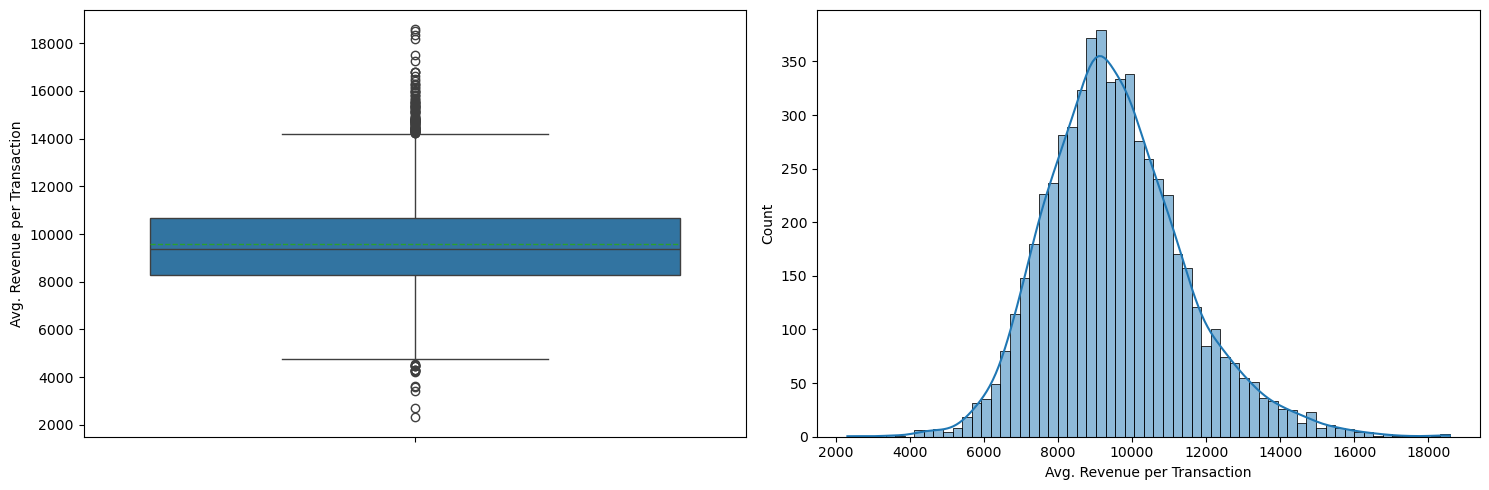

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data= user_agg_data, y= 'Avg. Revenue per Transaction', meanline= True, showmeans= True, ax= axes[0])
sns.histplot(data= user_agg_data, x= 'Avg. Revenue per Transaction', kde= True, ax= axes[1])

# axes[1].set_xticks(range(0,25000,2500))
plt.tight_layout()
plt.show()

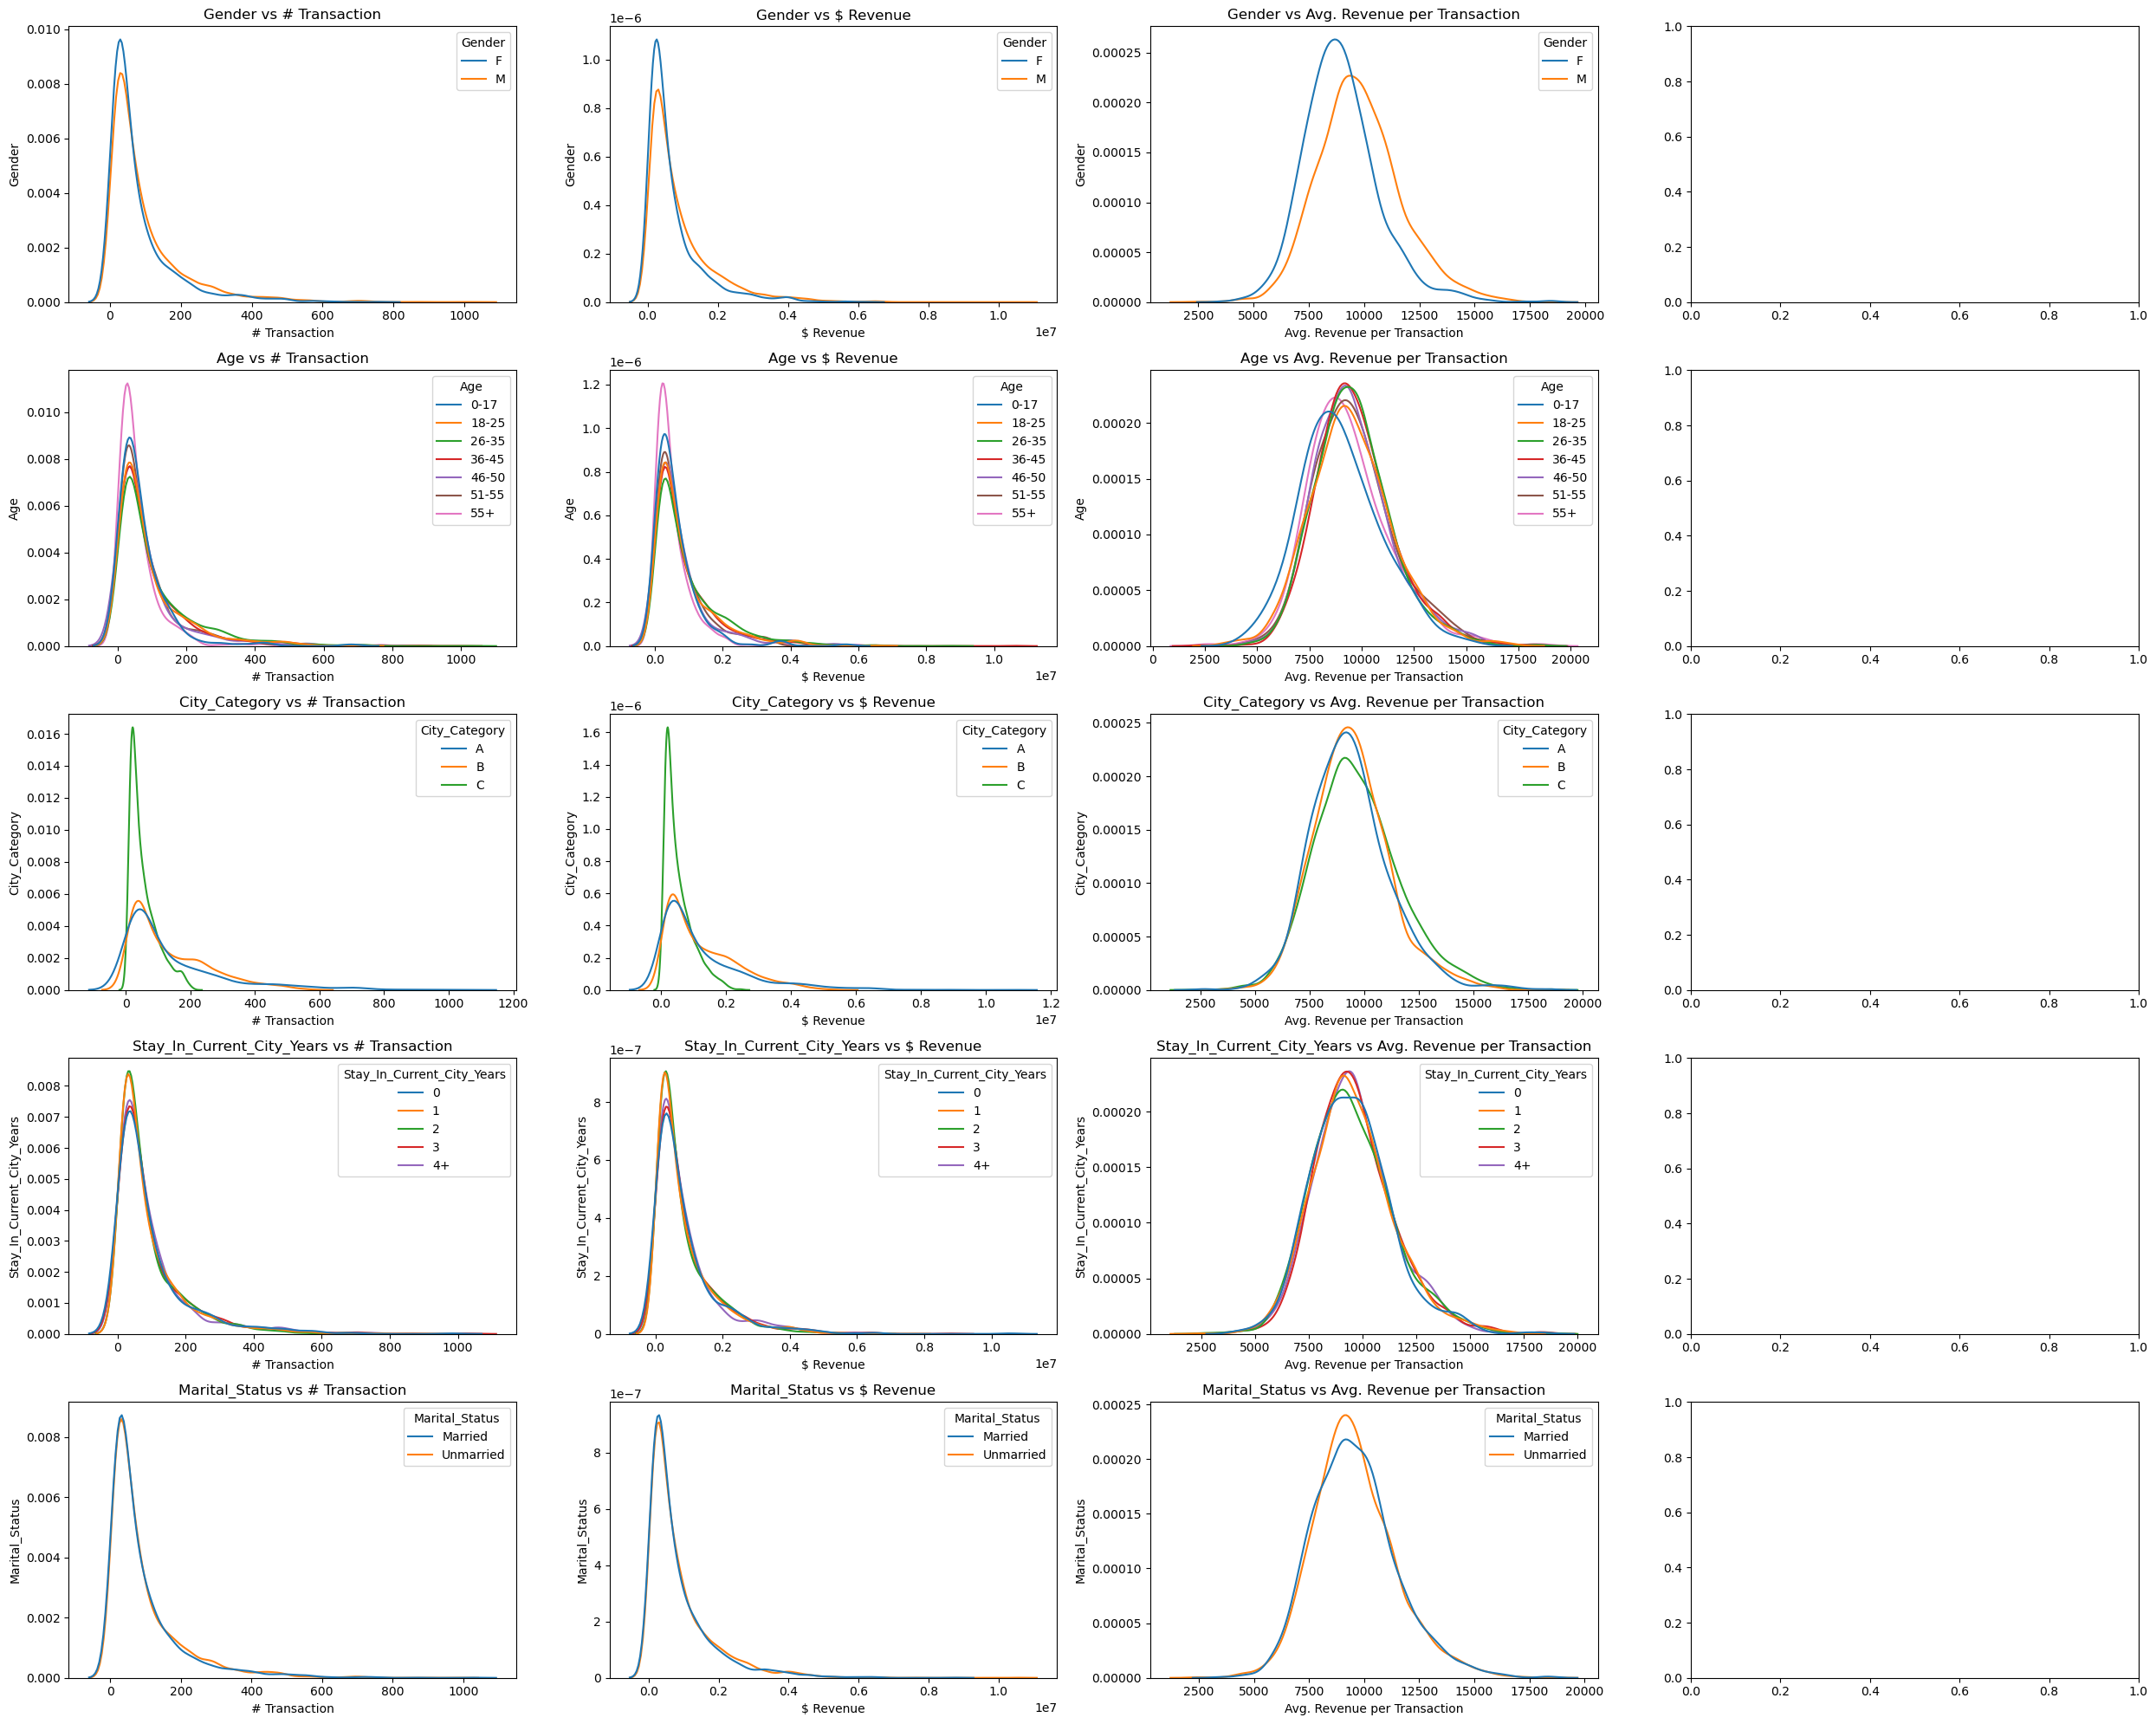

In [91]:
r, c = get_size(categorical_columns), get_size(user_base_aggs) + get_size(user_agg_columns) + 1

fig, axes = plt.subplots(r, c, figsize=(r*5, c*5))

for i, column in enumerate(categorical_columns):
    for j, agg_column in enumerate(user_agg_columns):
        sns.kdeplot(data= user_agg_data, x= agg_column, hue= column, common_norm= False, ax= axes[i][j])
        axes[i][j].set_title(f'{column} vs {agg_column}')
        axes[i][j].set_xlabel(agg_column)
        axes[i][j].set_ylabel(column)

plt.tight_layout()
plt.show()

### Observations

- The average revenue per transaction seems to approximately follow a normal distribution, need to check for the same
- Gender
  - There seems to be more female customers who make low order value transactions
  - The same trend seems to appear for Transaction volume and Revenue
- Age
  - The avg order value seems to be distributed similarly across age
  - There are more customers in the age group 55+ who contributed low revenue with low transaction volume
- City
  - Though the average order value is same across cities, there seems to be more customers with higher average order value in City C compared to others
  - There are very large no of customers with low revenue and transaction volume in City C compared to other cities
  - The trend here seems to be that most of users from City C make very few transactions of slightly high average order value
- Marital Status
  - The distribution of transaction volume and revenue seems to be exactly overlapping across marital status
  - The same is the case for average order value with the exception that there are slightly more customers at the mean avg purchase per transaction

### Next Steps
1. Test the hypthesis that average purchase per transaction is similar across age, gender, marital status, city
2. Identify the confidence intervals and check for overlap for the population across the above categories
   1. Observe the distribution of sample means at different sample sizes
   2. Calculate the confidence intervals at different confidence levels: 90%, 95%, 99%

# Hypothesis Testing

**Test Hypothesis Framework**

*Metric: Avg purchase amount per transaction*

*Null Hypothesis: There is no significant difference between the variables*

| Variable          | Variable Type | Cardinality   | Alternate Hypothesis       |
| :---------------- | :------------ | :------------ | :------------------------- |
| Gender            | Categorical   | 2             | Greater for Male           |
| Marital_Status    | Categorical   | 2             | Greater for Unmarried      |
| Age               | Categorical   | 6             | Greater for (26-35 / 18-45)|
| City_Category     | Categorical   | 3             | Lesser for City C          |


**Choice of Test Framework**

```yaml
Variable Type
├── Numerical vs Categorical:
│   ├── Cardinality = 2:
│   |   ├── Normal: Yes → Two Sample T-Test Independent
│   |   └── Normal: No → Two Sample KS-Test
│   └── Cardinality > 2: No  → Outcome B
│       ├── Normal and Homoscedastic: Yes → Two Sample ANOVA
│       └── Normal and Homoscedastic: No → Kruskal-Wallis Test
├── Categorical vs Categorical:
└── Numerical vs Numerical:
```

## Gender

*Metric: Avg purchase amount per transaction*

*Null Hypothesis (H0): There is no significant difference between the male vs female customers*

*Alternate Hypothesis(Ha): Male avg purchase amount per transaction is greater than female*


In [92]:
# Checking for data types and cardinality and sample size

print(user_agg_data['Avg. Revenue per Transaction'].dtype, user_agg_data['Gender'].dtype)

print(user_agg_data['Avg. Revenue per Transaction'].shape, user_agg_data['Gender'].nunique())

user_agg_data['Gender'].value_counts()

float64 category
(5891,) 2


Gender
M    4225
F    1666
Name: count, dtype: int64

*Sample size: 5891 (no. of customers)*

*Data Types: Avg Revenue per Transaction is Numerical and Gender is categorical*

*Cardinality: Gender has 2 values M (male: 4225) and F (female: 1666)*

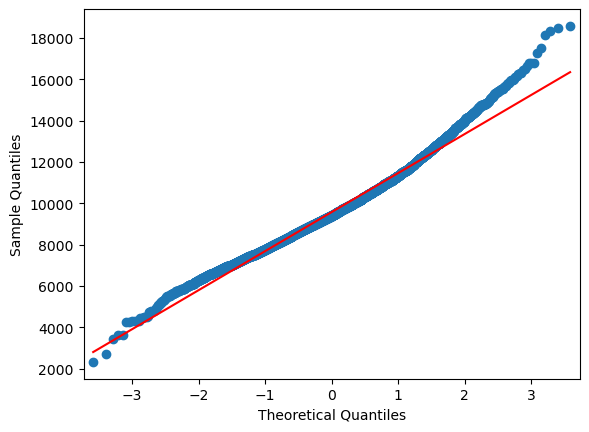

The sample data not follow a normal distribution at 95% confidence level with ks_stat: 1.0, p_val: 0.0


In [93]:
# Checking for Normality of the metric using QQ plot and KS Test (one sample - theoretical normal)

sm.qqplot(user_agg_data['Avg. Revenue per Transaction'], line= 's')
plt.show()

ks_stat, p_val = st.kstest(user_agg_data['Avg. Revenue per Transaction'], 'norm')

alpha = 0.05
if p_val > alpha:
    print(f"The sample data follows a normal distribution at {int((1 - alpha)*100)}% confidence level with ks_stat: {ks_stat}, p_val: {p_val}")
else:
    print(f"The sample data not follow a normal distribution at {int((1 - alpha)*100)}% confidence level with ks_stat: {ks_stat}, p_val: {p_val}")

### Observations:
- The qq plot looks mostly linear with outliers towards the right, 
- The ks test shows that the sample is not following a normal distribution

In [94]:
male_purchase_data = user_agg_data[user_agg_data['Gender'] == 'M']['Avg. Revenue per Transaction']
female_purchase_data = user_agg_data[user_agg_data['Gender'] == 'F']['Avg. Revenue per Transaction']

**Assumption: Average spending does not follow a normal distribution as per the ks test**

**Checking for the null hypothesis using Two Sample KS Test with two tailed alternative hypothesis**


In [95]:
ks_stat, p_val = st.kstest(male_purchase_data, female_purchase_data, alternative= 'two-sided')

print(f"ks_stat: {ks_stat:4f}, p_val: {p_val:4f}")


alpha = 0.05
if p_val > alpha:
    print(f"There is not significant difference between Male and Female purchase distributions at {int((1 - alpha)*100)}% confidence level")
else:
    print(f"There is a significant difference between Male and Female purchase distributions at {int((1 - alpha)*100)}% confidence level")

ks_stat: 0.219469, p_val: 0.000000
There is a significant difference between Male and Female purchase distributions at 95% confidence level


### Observations:
- The average spending amount **is significantly different** for male vs female customers

**Assumption: Average spending follows almost normal distribution as per the qq plot, despite the ks test not showing significance**

In [96]:
male_purchase_data.mean(), female_purchase_data.mean()

(9806.867524226629, 8965.19846393646)

**Checking for the null hypothesis using Two Sample T Test with left tailed alternative hypothesis (male spending is greater than female)**

*Left tailed test because mean of avg purchase amount for male is higher than female*

In [97]:
t_stat, p_val = st.ttest_ind(male_purchase_data, female_purchase_data, alternative= 'greater')

print(f"t_stat: {t_stat:4f}, p_val: {p_val:4f}")


alpha = 0.05
if p_val > alpha:
    print(f"There is no significant difference between avg spending for Male and Female users at {int((1 - alpha)*100)}% confidence level")
else:
    print(f"Male avg purchase amount is significantly greater than Female at {int((1 - alpha)*100)}% confidence level")

t_stat: 15.710671, p_val: 0.000000
Male avg purchase amount is significantly greater than Female at 95% confidence level


### Observations:
- Male avg purchase amount is significantly greater than Female as per the left tailed t-test at 95% confidence level

**Calculating the confidence intervals for male and female avg purchase amount**

In [98]:
male_purchase_size, male_purchase_mean, male_purchase_std = male_purchase_data.shape[0], male_purchase_data.mean(), male_purchase_data.std()
female_purchase_size, female_purchase_mean, female_purchase_std = female_purchase_data.shape[0], female_purchase_data.mean(), female_purchase_data.std()

male_purchase_se, female_purchase_se = male_purchase_std / mt.sqrt(male_purchase_size), female_purchase_std / mt.sqrt(female_purchase_size)

width = 0.95

lower_width, upper_width = (1 - width)/2, width - ((1-width)/2)
male_purchase_lower, male_purchase_upper = male_purchase_mean + (st.norm.ppf(lower_width) * male_purchase_se), male_purchase_mean + (st.norm.ppf(upper_width) * male_purchase_se)
female_purchase_lower, female_purchase_upper = female_purchase_mean + (st.norm.ppf(lower_width) * female_purchase_se), female_purchase_mean + (st.norm.ppf(upper_width) * female_purchase_se)

print(f"Male population avg purchase amount {int(width*100)}% confidence interval: {male_purchase_lower:2f} - {male_purchase_upper:2f}")
print(f"Female population avg purchase amount {int(width*100)}% confidence interval: {female_purchase_lower:2f} - {female_purchase_upper:2f}")

Male population avg purchase amount 95% confidence interval: 9749.383406 - 9849.087789
Female population avg purchase amount 95% confidence interval: 8883.296988 - 9025.352504


### Observations:

- There is no overlap between male (9749.4 - 9849.1) and female (8883.3 - 9025.3) avg purchase amount for the population at 95% confidence interval

**Validating the overlap of confidence intervals for male and female avg purchase amount at different widths and sample sizes**

In [99]:
def get_confidence_interval(data, sample_pct, width):
    if sample_pct < 1:
        sample_data = data.sample(frac= sample_pct)
    else:
        sample_data = data

    sample_size, sample_mean, sample_std = sample_data.shape[0], sample_data.mean(), sample_data.std()

    sample_se = sample_std / mt.sqrt(sample_size)

    lower_width, upper_width = (1 - width)/2, width - ((1-width)/2)
    sample_lower, sample_upper = (
        sample_mean + (st.norm.ppf(lower_width) * sample_se),
        sample_mean + (st.norm.ppf(upper_width) * sample_se)
        )

    return [sample_lower, sample_upper]

def check_overlap(left_interval, right_interval):
    if len(left_interval) != 2 or len(right_interval) != 2:
        return 'Invalid inteval size'
    
    if (left_interval[0] > left_interval[1]) or (right_interval[0] > right_interval[1]):
        return 'Invalid interval order'
    
    if left_interval[1] < right_interval[0] or right_interval[1] < left_interval[0]:
        return 'No Overlap'
    
    return 'Overlap'

In [100]:
params = {
    'width': [0.90, 0.95, 0.99],
    'sample_pct': [0.10, 0.25, 0.50, 0.75, 0.90]
}

confidence_intervals_data = pd.DataFrame()

for w in params['width']:
    for pct in params['sample_pct']:
        male_confidence_interval = get_confidence_interval(male_purchase_data, sample_pct= pct, width= w)
        female_confidence_interval = get_confidence_interval(female_purchase_data, sample_pct= pct, width= w)

        current_confidence_intervals = pd.DataFrame(
            {
                'width': w, 'sample_pct': pct,
                'female_interval': f'[{female_confidence_interval[0]:2f}, {female_confidence_interval[1]:2f}]',
                'female_interval_range': female_confidence_interval[1] - female_confidence_interval[0],
                'male_interval': f'[{male_confidence_interval[0]:2f}, {male_confidence_interval[1]:2f}]',
                'male_interval_range': male_confidence_interval[1] - male_confidence_interval[0],
                'overlap_status': check_overlap(male_confidence_interval, female_confidence_interval)
            },
            index= [0]
        )

        confidence_intervals_data = (
            pd.concat([confidence_intervals_data, current_confidence_intervals], ignore_index= True)
        )

confidence_intervals_data

,width,sample_pct,female_interval,female_interval_range,male_interval,male_interval_range,overlap_status
0,0.90,0.10,"[8754.445743, 9119.808351]",365.362608,"[9521.854783, 9770.751725]",248.896942,No Overlap
1,0.90,0.25,"[8845.332585, 9053.629102]",208.296517,"[9671.682889, 9827.578468]",155.895579,No Overlap
2,0.90,0.50,"[8819.715048, 8980.560083]",160.845034,"[9763.959012, 9875.079198]",111.120185,No Overlap
3,0.90,0.75,"[8890.747606, 9021.451069]",130.703463,"[9723.231337, 9814.179208]",90.947871,No Overlap
4,0.90,0.90,"[8860.428652, 8975.330489]",114.901837,"[9750.803178, 9833.743059]",82.939881,No Overlap
5,0.95,0.10,"[8646.665229, 9044.704775]",398.039546,"[9627.094196, 9924.397091]",297.302895,No Overlap
6,0.95,0.25,"[8733.963809, 9024.963630]",290.999821,"[9632.777876, 9837.467294]",204.689419,No Overlap
7,0.95,0.50,"[8779.599580, 8979.507642]",199.908062,"[9659.439167, 9798.734187]",139.295020,No Overlap
8,0.95,0.75,"[8900.138249, 9062.522383]",162.384134,"[9736.325516, 9852.111118]",115.785602,No Overlap
9,0.95,0.90,"[8885.376300, 9036.475883]",151.099584,"[9754.860999, 9860.096985]",105.235986,No Overlap


### Observations:

- The confidence interval range increases as the sample size decreases and also as the width increases
- There is no overlap at different combinations of width and sample sizes
- Hence, it can be concluded that male avg spend amount is significantly higher than female

## Marital Status

*Metric: Avg purchase amount per transaction*

*Null Hypothesis (H0): There is no significant difference between the married vs unmarried customers*

*Alternate Hypothesis(Ha): Avg purchase amount per transaction is greater for Married customers than Unmarried*


In [101]:
# Checking for data types and cardinality and sample size

print(user_agg_data['Avg. Revenue per Transaction'].dtype, user_agg_data['Marital_Status'].dtype)

print(user_agg_data['Avg. Revenue per Transaction'].shape, user_agg_data['Marital_Status'].nunique())

user_agg_data['Marital_Status'].value_counts()

float64 category
(5891,) 2


Marital_Status
Unmarried    3417
Married      2474
Name: count, dtype: int64

*Sample size: 5891 (no. of customers)*

*Data Types: Avg Revenue per Transaction is Numerical and Marital Status is categorical*

*Cardinality: Gender has 2 values Unmarried (3417) and Married (2474)*

In [102]:
married_purchase_data = user_agg_data[user_agg_data['Marital_Status'] == 'Married']['Avg. Revenue per Transaction']
unmarried_purchase_data = user_agg_data[user_agg_data['Marital_Status'] == 'Unmarried']['Avg. Revenue per Transaction']

**Assumption: Average spending does not follow a normal distribution as per the ks test**

**Checking for the null hypothesis using Two Sample KS Test with two tailed alternative hypothesis**


In [103]:
ks_stat, p_val = st.kstest(married_purchase_data, unmarried_purchase_data, alternative= 'two-sided')

print(f"ks_stat: {ks_stat:4f}, p_val: {p_val:4f}")


alpha = 0.05
if p_val > alpha:
    print(f"There is no significant difference between Unmarried and Married customer purchase distributions at {int((1 - alpha)*100)}% confidence level")
else:
    print(f"There is a significant difference between Unmarried and Married customer purchase distributions at {int((1 - alpha)*100)}% confidence level")

ks_stat: 0.023913, p_val: 0.377029
There is no significant difference between Unmarried and Married customer purchase distributions at 95% confidence level


### Observations:
- The average spending amount **is not significantly different** for married vs unmarried customers

**Assumption: Average spending follows almost normal distribution as per the qq plot, despite the ks test showing otherwise**

In [104]:
married_purchase_data.mean(), unmarried_purchase_data.mean()

(9574.962299031744, 9564.407141636266)

**Checking for the null hypothesis using Two Sample T Test with left tailed alternative hypothesis (married spending is greater than unmarried)**

*Left tailed test because mean of avg purchase amount for married is higher than unmarried*

In [105]:
t_stat, p_val = st.ttest_ind(married_purchase_data, unmarried_purchase_data, alternative= 'greater')

print(f"t_stat: {t_stat:4f}, p_val: {p_val:4f}")


alpha = 0.05
if p_val > alpha:
    print(f"There is no significant difference between avg spending for married and unmarried users at {int((1 - alpha)*100)}% confidence level")
else:
    print(f"Married customer avg purchase amount is significantly greater than Unmarried customers at {int((1 - alpha)*100)}% confidence level")

t_stat: 0.211532, p_val: 0.416240
There is no significant difference between avg spending for married and unmarried users at 95% confidence level


### Observations:
- There is no significant difference between avg spending between married and unmarried customers

**Calculating the confidence intervals for Married and Unmarried avg purchase amount**

In [106]:
married_purchase_size, married_purchase_mean, married_purchase_std = married_purchase_data.shape[0], married_purchase_data.mean(), married_purchase_data.std()
unmarried_purchase_size, unmarried_purchase_mean, unmarried_purchase_std = unmarried_purchase_data.shape[0], unmarried_purchase_data.mean(), unmarried_purchase_data.std()

married_purchase_se, unmarried_purchase_se = married_purchase_std / mt.sqrt(married_purchase_size), unmarried_purchase_std / mt.sqrt(unmarried_purchase_size)

width = 0.95

lower_width, upper_width = (1 - width)/2, width - ((1-width)/2)
married_purchase_lower, married_purchase_upper = married_purchase_mean + (st.norm.ppf(lower_width) * married_purchase_se), married_purchase_mean + (st.norm.ppf(upper_width) * married_purchase_se)
unmarried_purchase_lower, unmarried_purchase_upper = unmarried_purchase_mean + (st.norm.ppf(lower_width) * unmarried_purchase_se), unmarried_purchase_mean + (st.norm.ppf(upper_width) * unmarried_purchase_se)

print(f"Married population avg purchase amount {int(width*100)}% confidence interval: {married_purchase_lower:2f} - {married_purchase_upper:2f}")
print(f"Unmarried population avg purchase amount {int(width*100)}% confidence interval: {unmarried_purchase_lower:2f} - {unmarried_purchase_upper:2f}")

Married population avg purchase amount 95% confidence interval: 9499.780970 - 9630.180604
Unmarried population avg purchase amount 95% confidence interval: 9501.461343 - 9610.638837


### Observations:

- There is a full overlap of intervals between married and unmarried avg purchase amount for the population at 95% confidence interval
- The interval for unmarried customers is contained within the married population interval

**Validating the overlap of confidence intervals for married and unmarried avg purchase amount at different widths and sample sizes**

In [107]:
params = {
    'width': [0.90, 0.95, 0.99],
    'sample_pct': [0.10, 0.25, 0.50, 0.75, 0.90]
}

confidence_intervals_data = pd.DataFrame()

for w in params['width']:
    for pct in params['sample_pct']:
        married_confidence_interval = get_confidence_interval(married_purchase_data, sample_pct= pct, width= w)
        unmarried_confidence_interval = get_confidence_interval(unmarried_purchase_data, sample_pct= pct, width= w)

        current_confidence_intervals = pd.DataFrame(
            {
                'width': w, 'sample_pct': pct,
                'unmarried_interval': f'[{unmarried_confidence_interval[0]:2f}, {unmarried_confidence_interval[1]:2f}]',
                # 'unmarried_interval_lower': unmarried_confidence_interval[0],
                # 'unmarried_interval_upper': unmarried_confidence_interval[1],
                'unmarried_interval_range': unmarried_confidence_interval[1] - unmarried_confidence_interval[0],
                'married_interval': f'[{married_confidence_interval[0]:2f}, {married_confidence_interval[1]:2f}]',
                # 'married_interval_lower': married_confidence_interval[0],
                # 'married_interval_upper': married_confidence_interval[1],
                'married_interval_range': married_confidence_interval[1] - married_confidence_interval[0],
                'overlap_status': check_overlap(married_confidence_interval, unmarried_confidence_interval)
            },
            index= [0]
        )

        confidence_intervals_data = (
            pd.concat([confidence_intervals_data, current_confidence_intervals], ignore_index= True)
        )

confidence_intervals_data

,width,sample_pct,unmarried_interval,unmarried_interval_range,married_interval,married_interval_range,overlap_status
0,0.90,0.10,"[9456.685682, 9724.652698]",267.967016,"[9281.544505, 9602.926664]",321.382159,Overlap
1,0.90,0.25,"[9537.063888, 9714.984532]",177.920645,"[9448.119790, 9659.248697]",211.128907,Overlap
2,0.90,0.50,"[9458.396060, 9581.247041]",122.850980,"[9461.754717, 9608.028602]",146.273885,Overlap
3,0.90,0.75,"[9493.321916, 9592.516179]",99.194263,"[9505.769631, 9621.270724]",115.501093,Overlap
4,0.90,0.90,"[9520.772718, 9611.930054]",91.157336,"[9482.307615, 9589.760260]",107.452645,Overlap
5,0.95,0.10,"[9380.409603, 9734.457281]",354.047678,"[9235.446009, 9647.400711]",411.954701,Overlap
6,0.95,0.25,"[9296.183671, 9512.353264]",216.169593,"[9524.701857, 9782.034070]",257.332213,No Overlap
7,0.95,0.50,"[9460.214606, 9616.493799]",156.279193,"[9511.058052, 9702.482770]",191.424718,Overlap
8,0.95,0.75,"[9484.504851, 9611.260095]",126.755244,"[9487.214988, 9639.746651]",152.531663,Overlap
9,0.95,0.90,"[9490.805246, 9605.662598]",114.857352,"[9509.644507, 9648.151825]",138.507318,Overlap


### Observations:

- The confidence interval range increases as the sample size decreases and also as the width increases
- There is a significant overlap at different combinations of width and sample sizes between confidence intervals of married and unmarried customers
- Hence, it can be concluded that there is **no significant** difference between avg spend amount for married vs unmarried customers

## Age

*Metric: Avg purchase amount per transaction*

*Null Hypothesis (H0): There is no significant difference across age groups*

*Alternate Hypothesis(Ha): Avg purchase amount is significantly different across age groups*


In [108]:
# Checking for data types and cardinality and sample size

print(user_agg_data['Avg. Revenue per Transaction'].dtype, user_agg_data['Age'].dtype)

print(user_agg_data['Avg. Revenue per Transaction'].shape, user_agg_data['Age'].nunique())

user_agg_data['Age'].value_counts()

float64 category
(5891,) 7


Age
26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: count, dtype: int64

### Next Steps
- For simplicity and actionable result, 36-45, 46-50 can be grouped together

In [109]:
age_group_mapping = {
    '0-17': '0-17',
    '18-25': '18-25',
    '26-35': '26-35',
    '36-45': '36-50',
    '46-50': '36-50',
    '51-55': '50+',
    '55+': '50+'
}

user_agg_data['Age_Group'] = user_agg_data['Age'].map(age_group_mapping).astype('category')

# Checking for data types and cardinality and sample size

print(user_agg_data['Avg. Revenue per Transaction'].dtype, user_agg_data['Age_Group'].dtype)

print(user_agg_data['Avg. Revenue per Transaction'].shape, user_agg_data['Age_Group'].nunique())

user_agg_data['Age_Group'].value_counts()

float64 category
(5891,) 5


Age_Group
26-35    2053
36-50    1698
18-25    1069
50+       853
0-17      218
Name: count, dtype: int64

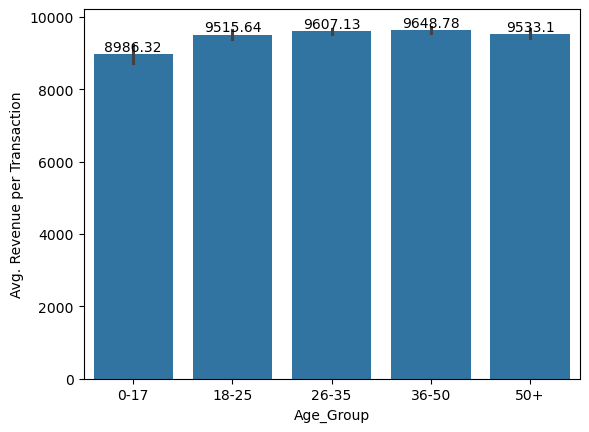

In [110]:
ax = sns.barplot(data= user_agg_data, x= 'Age_Group', y= 'Avg. Revenue per Transaction')

ax.bar_label(ax.containers[0])
plt.show()

*Sample size: 5891 (no. of customers)*

*Data Types: Avg Revenue per Transaction is Numerical and Age is categorical*

*Cardinality: Age has 4 values 0-25, 26-35, 36-45, 46+*

In [111]:
age_0_17_purchase_data = user_agg_data[user_agg_data['Age_Group'] == '0-17']['Avg. Revenue per Transaction']
age_18_25_purchase_data = user_agg_data[user_agg_data['Age_Group'] == '18-25']['Avg. Revenue per Transaction']
age_26_35_purchase_data = user_agg_data[user_agg_data['Age_Group'] == '26-35']['Avg. Revenue per Transaction']
age_36_50_purchase_data = user_agg_data[user_agg_data['Age_Group'] == '36-50']['Avg. Revenue per Transaction']
age_50P_purchase_data = user_agg_data[user_agg_data['Age_Group'] == '50+']['Avg. Revenue per Transaction']

age_group_purchase_data_dict = {
    '0-17'  : age_0_17_purchase_data,
    '18-25'  : age_18_25_purchase_data,
    '26-35' : age_26_35_purchase_data,
    '36-50' : age_36_50_purchase_data,
    '50+'   : age_50P_purchase_data
}


**Assumption: Average spending does not follow a normal distribution as per the ks test**

**Checking for the null hypothesis using Kruskal Wallis Test with two tailed alternative hypothesis**


In [112]:
ks_stat, p_val = st.kruskal(age_0_17_purchase_data, age_18_25_purchase_data, age_26_35_purchase_data, age_36_50_purchase_data, age_50P_purchase_data)

print(f"ks_stat: {ks_stat:4f}, p_val: {p_val:4f}")


alpha = 0.05
if p_val > alpha:
    print(f"There is no significant difference in median of avg purchase amount between age groups at {int((1 - alpha)*100)}% confidence level")
else:
    print(f"There is a significant difference in median of avg purchase amount between age groups at {int((1 - alpha)*100)}% confidence level")

ks_stat: 27.391812, p_val: 0.000017
There is a significant difference in median of avg purchase amount between age groups at 95% confidence level


### Observations:
- The median of average spending amount **is significantly different** between age groups of customers

**Assumption: Average spending follows almost normal distribution as per the qq plot, despite the ks test showing otherwise**

**Checking for homoscedasticity using Levene's test for applying ANOVA Test**

In [113]:
l_stat, p_val = st.levene(age_0_17_purchase_data, age_18_25_purchase_data, age_26_35_purchase_data, age_36_50_purchase_data, age_50P_purchase_data)

print(f"l_stat: {l_stat:4f}, p_val: {p_val:4f}")


alpha = 0.05
if p_val > alpha:
    print(f"There is no significant difference variances of avg spending between age groups at {int((1 - alpha)*100)}% confidence level")
else:
    print(f"There is a significant difference variances of avg spending between age groups at {int((1 - alpha)*100)}% confidence level")

l_stat: 2.761620, p_val: 0.026140
There is a significant difference variances of avg spending between age groups at 95% confidence level


### Observation:
- There is a significant difference in variances across age groups at 95% confidence level
- The result would change to having equal variance at 99% confidence level
- Perform ANOVA nevertheless based on 99% confidence result to make sure again that there is no difference

**Checking for the null hypothesis using ANOVA Test**

In [114]:
f_stat, p_val = st.f_oneway(age_0_17_purchase_data, age_18_25_purchase_data, age_26_35_purchase_data, age_36_50_purchase_data, age_50P_purchase_data)

print(f"f_stat: {f_stat:4f}, p_val: {p_val:4f}")


alpha = 0.05
if p_val > alpha:
    print(f"There is no significant difference between avg spending between age groups of customers at {int((1 - alpha)*100)}% confidence level")
else:
    print(f"There is a significant difference between avg spending between age groups of customers at {int((1 - alpha)*100)}% confidence level")

f_stat: 6.458619, p_val: 0.000035
There is a significant difference between avg spending between age groups of customers at 95% confidence level


### Observations:
- ANOVA: There is a significant difference between avg spending between age groups of customers
- Kruskal Wallis: ANOVA: There is a significant difference between avg spending between age groups of customers
- Both the tests result in the same conclusion that the average spending behaviour is different across age groups

### Next Steps:

- Apply ttest for all combinations to identify similar and significantly different groups
- Merge the subsequent groups that are not significantly different
- Compare the confidence intervals of the final groups and check for overlaps

In [115]:
def get_ttest_result(left_data, right_data, alpha):
    
    two_tailed_t_stat, two_tailed_p_val = st.ttest_ind(left_data, right_data, alternative= 'two-sided')

    two_tailed_result = 'same' if two_tailed_p_val > alpha else 'different'

    alternative = 'less' if left_data.mean() < right_data.mean() else 'greater'

    one_tailed_t_stat, one_tailed_p_val = st.ttest_ind(left_data, right_data, alternative= alternative)

    one_tailed_result = 'same' if one_tailed_p_val > alpha else alternative

    result = {
        'two_tailed_p_val'  : round(two_tailed_p_val, 5),
        'two_tailed_result' : two_tailed_result,
        'one_tailed_p_val'  : round(one_tailed_p_val, 5),
        'one_tailed_result' : one_tailed_result
    }

    return result

**Calculating the ttest results and confidence intervals of avg purchase amount for all combinations of age groups**

In [116]:
age_group_names = list(age_group_purchase_data_dict.keys())
age_group_ttest_results_data = pd.DataFrame()
alpha= 0.05; width = 1 - alpha

for i in range(len(age_group_names)):
    for j in range(i + 1, len(age_group_names)):

        result = dict()
        result['left_age_group'], result['right_age_group'] = age_group_names[i], age_group_names[j]
        result.update(
            get_ttest_result(
                age_group_purchase_data_dict[age_group_names[i]],
                age_group_purchase_data_dict[age_group_names[j]],
                alpha
            )
        )
        left_confidence_interval = get_confidence_interval(
            age_group_purchase_data_dict[age_group_names[i]], sample_pct= 1, width= 1 - alpha
            )
        right_confidence_interval = get_confidence_interval(
            age_group_purchase_data_dict[age_group_names[j]], sample_pct= 1, width= 1 - alpha
            )

        result.update(
            {
                'left_interval': f'[{left_confidence_interval[0]:2f}, {left_confidence_interval[1]:2f}]',
                'right_interval': f'[{right_confidence_interval[0]:2f}, {right_confidence_interval[1]:2f}]',
                'overlap_status': check_overlap(left_confidence_interval, right_confidence_interval)
            }
        )
        result_data = pd.DataFrame(
            data= result, index= [0]
        )
        
        age_group_ttest_results_data = pd.concat([age_group_ttest_results_data, result_data], ignore_index= True)

age_group_ttest_results_data

,left_age_group,right_age_group,two_tailed_p_val,two_tailed_result,one_tailed_p_val,one_tailed_result,left_interval,right_interval,overlap_status
0,0-17,18-25,0.00034,different,0.00017,less,"[8729.913649, 9174.639404]","[9396.177701, 9603.375240]",No Overlap
1,0-17,26-35,0.00000,different,0.00000,less,"[8729.913649, 9174.639404]","[9528.202654, 9665.094255]",No Overlap
2,0-17,36-50,0.00000,different,0.00000,less,"[8729.913649, 9174.639404]","[9560.901632, 9713.330298]",No Overlap
3,0-17,50+,0.00024,different,0.00012,less,"[8729.913649, 9174.639404]","[9401.542800, 9629.729789]",No Overlap
4,18-25,26-35,0.19796,same,0.09898,same,"[9396.177701, 9603.375240]","[9528.202654, 9665.094255]",Overlap
5,18-25,36-50,0.07354,same,0.03677,less,"[9396.177701, 9603.375240]","[9560.901632, 9713.330298]",Overlap
6,18-25,50+,0.84753,same,0.42377,same,"[9396.177701, 9603.375240]","[9401.542800, 9629.729789]",Overlap
7,26-35,36-50,0.48896,same,0.24448,same,"[9528.202654, 9665.094255]","[9560.901632, 9713.330298]",Overlap
8,26-35,50+,0.33008,same,0.16504,same,"[9528.202654, 9665.094255]","[9401.542800, 9629.729789]",Overlap
9,36-50,50+,0.14401,same,0.07201,same,"[9560.901632, 9713.330298]","[9401.542800, 9629.729789]",Overlap


### Observations:

- The avg purchase amount of 0-17 age group is significantly lesses from other groups without overlap
- The other groups have similar average purchase value among each other with overlaps for exceptions
- A final grouping of 0-17, 18+ will be useful for further analysis and actionable insights

In [117]:
age_group_final_mapping = {
    '0-17': '0-17',
    '18-25': '18+',
    '26-35': '18+',
    '36-45': '18+',
    '46-50': '18+',
    '51-55': '18+',
    '55+': '18+'
}

user_agg_data['Age_Group_Final'] = user_agg_data['Age'].map(age_group_final_mapping).astype('category')


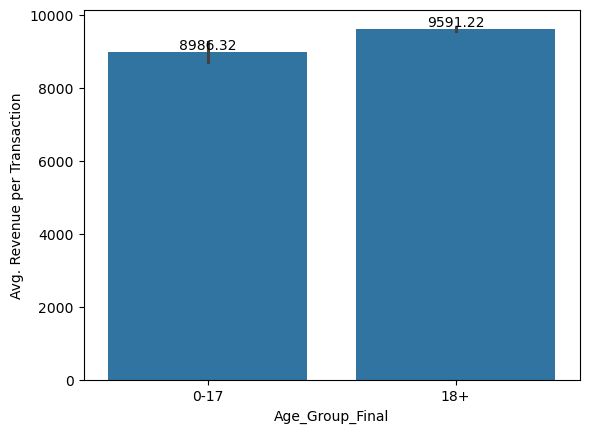

In [118]:
ax = sns.barplot(data= user_agg_data, x= 'Age_Group_Final', y= 'Avg. Revenue per Transaction')

ax.bar_label(ax.containers[0])
plt.show()

**Validating the overlap of confidence intervals for age <18 and 18+ avg purchase amount at different widths and sample sizes**

In [119]:
age_final_L17_purchase_data = user_agg_data[user_agg_data['Age_Group_Final'] == '0-17']['Avg. Revenue per Transaction']
age_final_18P_purchase_data = user_agg_data[user_agg_data['Age_Group_Final'] == '18+']['Avg. Revenue per Transaction']

In [120]:
params = {
    'width': [0.90, 0.95, 0.99],
    'sample_pct': [0.10, 0.50, 0.90]
}

confidence_intervals_data = pd.DataFrame()

for w in params['width']:
    for pct in params['sample_pct']:
        age_final_L17_confidence_interval = get_confidence_interval(age_final_L17_purchase_data, sample_pct= pct, width= w)
        age_final_18P_confidence_interval = get_confidence_interval(age_final_18P_purchase_data, sample_pct= pct, width= w)

        current_confidence_intervals = pd.DataFrame(
            {
                'width': w, 'sample_pct': pct,
                'age_L17_interval': f'[{age_final_L17_confidence_interval[0]:2f}, {age_final_L17_confidence_interval[1]:2f}]',
                'age_L17_interval_range': age_final_L17_confidence_interval[1] - age_final_L17_confidence_interval[0],
                'age_18P_interval': f'[{age_final_18P_confidence_interval[0]:2f}, {age_final_18P_confidence_interval[1]:2f}]',
                'age_18P_interval_range': age_final_18P_confidence_interval[1] - age_final_18P_confidence_interval[0],
                'overlap_status': check_overlap(age_final_18P_confidence_interval, age_final_L17_confidence_interval)
            },
            index= [0]
        )

        confidence_intervals_data = (
            pd.concat([confidence_intervals_data, current_confidence_intervals], ignore_index= True)
        )

confidence_intervals_data

,width,sample_pct,age_L17_interval,age_L17_interval_range,age_18P_interval,age_18P_interval_range,overlap_status
0,0.90,0.1,"[8626.351693, 9671.058646]",1044.706953,"[9367.389890, 9584.341908]",216.952018,Overlap
1,0.90,0.5,"[8554.119611, 9042.834252]",488.714642,"[9525.039897, 9619.693722]",94.653825,No Overlap
2,0.90,0.9,"[8758.894314, 9134.207974]",375.313661,"[9551.029177, 9621.774685]",70.745508,No Overlap
3,0.95,0.1,"[8188.421046, 9349.524091]",1161.103046,"[9505.330927, 9763.842919]",258.511992,No Overlap
4,0.95,0.5,"[8622.575754, 9210.203516]",587.627762,"[9521.562101, 9643.821436]",122.259335,No Overlap
5,0.95,0.9,"[8768.593540, 9249.061785]",480.468245,"[9536.814387, 9626.671802]",89.857415,No Overlap
6,0.99,0.1,"[8156.275355, 10029.405173]",1873.129817,"[9287.694276, 9646.276037]",358.581761,Overlap
7,0.99,0.5,"[8453.420465, 9401.643469]",948.223004,"[9435.967421, 9604.875386]",168.907965,No Overlap
8,0.99,0.9,"[8666.925469, 9314.819340]",647.893871,"[9535.565178, 9661.258960]",125.693783,No Overlap


### Observations:

- There is no overlap at most of the combinations of width and sample sizes between confidence intervals of age <17 and 18+ customers, except for 99% width and 10% sample pct
- Hence, it can be concluded that there **is a significant difference** between avg spend amount for age <17 vs 18+ customers

## City Category

*Metric: Avg purchase amount per transaction*

*Null Hypothesis (H0): There is no significant difference across city categories*

*Alternate Hypothesis(Ha): Avg purchase amount is significantly different across city categories*


In [121]:
# Checking for data types and cardinality and sample size

print(user_agg_data['Avg. Revenue per Transaction'].dtype, user_agg_data['City_Category'].dtype)

print(user_agg_data['Avg. Revenue per Transaction'].shape, user_agg_data['City_Category'].nunique())

user_agg_data['City_Category'].value_counts()

float64 category
(5891,) 3


City_Category
C    3139
B    1707
A    1045
Name: count, dtype: int64

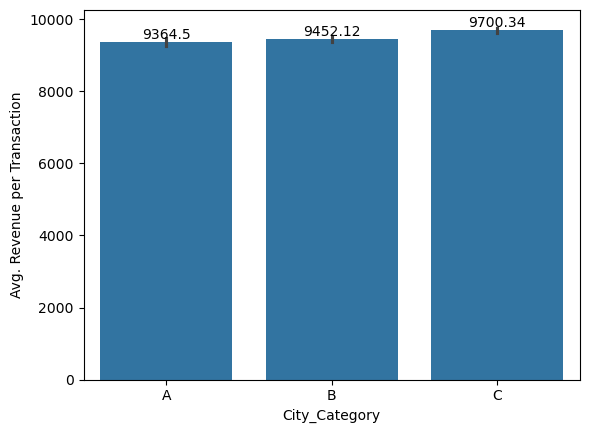

In [122]:
ax = sns.barplot(data= user_agg_data, x= 'City_Category', y= 'Avg. Revenue per Transaction')

ax.bar_label(ax.containers[0])
plt.show()

*Sample size: 5891 (no. of customers)*

*Data Types: Avg Revenue per Transaction is Numerical and City Category is categorical*

*Cardinality: City Category has 3 values A, B, C*

In [123]:
city_A_purchase_data = user_agg_data[user_agg_data['City_Category'] == 'A']['Avg. Revenue per Transaction']
city_B_purchase_data = user_agg_data[user_agg_data['City_Category'] == 'B']['Avg. Revenue per Transaction']
city_C_purchase_data = user_agg_data[user_agg_data['City_Category'] == 'C']['Avg. Revenue per Transaction']

city_category_purchase_data_dict = {
    'A' : city_A_purchase_data,
    'B' : city_B_purchase_data,
    'C' : city_C_purchase_data,
}


**Assumption: Average spending does not follow a normal distribution (as per the ks test)**

**Checking for the null hypothesis using Kruskal Wallis Test with two tailed alternative hypothesis**


In [124]:
ks_stat, p_val = st.kruskal(city_A_purchase_data, city_B_purchase_data, city_C_purchase_data)

print(f"ks_stat: {ks_stat:4f}, p_val: {p_val:4f}")


alpha = 0.05
if p_val > alpha:
    print(f"There is no significant difference in median of avg purchase amount between city categories at {int((1 - alpha)*100)}% confidence level")
else:
    print(f"There is a significant difference in median of avg purchase amount between city categories at {int((1 - alpha)*100)}% confidence level")

ks_stat: 32.399297, p_val: 0.000000
There is a significant difference in median of avg purchase amount between city categories at 95% confidence level


### Observations:
- The median of average spending amount **is significantly different** between city categories of customers

**Assumption: Average spending follows almost normal distribution as per the qq plot, despite the ks test showing otherwise**

**Checking for homoscedasticity using Levene's test for applying ANOVA Test**

In [125]:
l_stat, p_val = st.levene(city_A_purchase_data, city_B_purchase_data, city_C_purchase_data)

print(f"l_stat: {l_stat:4f}, p_val: {p_val:4f}")


alpha = 0.05
if p_val > alpha:
    print(f"There is no significant difference variances of avg spending between city categories at {int((1 - alpha)*100)}% confidence level")
else:
    print(f"There is a significant difference variances of avg spending between city categories at {int((1 - alpha)*100)}% confidence level")

l_stat: 16.735004, p_val: 0.000000
There is a significant difference variances of avg spending between city categories at 95% confidence level


### Observation:
- There is a significant difference in variances across city categories at 95% confidence level
- Hence, ANOVA test can not be applied in this scenario

### Observations:
- Kruskal Wallis: There is a significant difference between avg spending between city groups of customers

### Next Steps:

- Apply ttest for all combinations to identify similar and significantly different groups
- Merge the subsequent groups that are not significantly different
- Compare the confidence intervals of the final groups and check for overlaps

**Calculating the ttest results and confidence intervals of avg purchase amount for all combinations of age groups**

In [126]:
city_category_names = ['C', 'A', 'B']#list(city_category_purchase_data_dict.keys())
city_category_ttest_results_data = pd.DataFrame()
alpha= 0.05; width = 1 - alpha

for i in range(len(city_category_names)):
    for j in range(i + 1, len(city_category_names)):

        result = dict()
        result['left_city_category'], result['right_city_category'] = city_category_names[i], city_category_names[j]
        result.update(
            get_ttest_result(
                city_category_purchase_data_dict[city_category_names[i]],
                city_category_purchase_data_dict[city_category_names[j]],
                alpha
            )
        )
        left_confidence_interval = get_confidence_interval(
            city_category_purchase_data_dict[city_category_names[i]], sample_pct= 1, width= 1 - alpha
            )
        right_confidence_interval = get_confidence_interval(
            city_category_purchase_data_dict[city_category_names[j]], sample_pct= 1, width= 1 - alpha
            )

        result.update(
            {
                'left_interval': f'[{left_confidence_interval[0]:2f}, {left_confidence_interval[1]:2f}]',
                'right_interval': f'[{right_confidence_interval[0]:2f}, {right_confidence_interval[1]:2f}]',
                'overlap_status': check_overlap(left_confidence_interval, right_confidence_interval)
            }
        )
        result_data = pd.DataFrame(
            data= result, index= [0]
        )
        
        city_category_ttest_results_data = pd.concat([city_category_ttest_results_data, result_data], ignore_index= True)

city_category_ttest_results_data

,left_city_category,right_city_category,two_tailed_p_val,two_tailed_result,one_tailed_p_val,one_tailed_result,left_interval,right_interval,overlap_status
0,C,A,0.00000,different,0.00000,greater,"[9631.341935, 9751.015584]","[9254.039063, 9445.625139]",No Overlap
1,C,B,0.00001,different,0.00001,greater,"[9631.341935, 9751.015584]","[9368.916691, 9513.232904]",No Overlap
2,A,B,0.21021,same,0.10510,same,"[9254.039063, 9445.625139]","[9368.916691, 9513.232904]",Overlap


### Observations:

- The avg purchase amount of city C is significantly greater that other groups
- The avg purchase amount of city A and B are same

In [127]:
city_category_final_mapping = {
    'A': 'AB',
    'B': 'AB',
    'C': 'C',
}

user_agg_data['City_Category_Final'] = user_agg_data['City_Category'].map(city_category_final_mapping).astype('category')


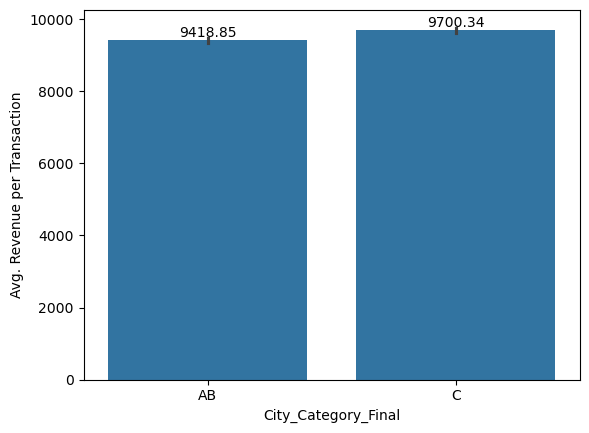

In [128]:
ax = sns.barplot(data= user_agg_data, x= 'City_Category_Final', y= 'Avg. Revenue per Transaction')

ax.bar_label(ax.containers[0])
plt.show()

**Validating the overlap of confidence intervals for age <18 and 18+ avg purchase amount at different widths and sample sizes**

In [129]:
city_category_final_AB_purchase_data = user_agg_data[user_agg_data['City_Category_Final'] == 'AB']['Avg. Revenue per Transaction']
city_category_final_C_purchase_data = user_agg_data[user_agg_data['City_Category_Final'] == 'C']['Avg. Revenue per Transaction']

In [130]:
params = {
    'width': [0.90, 0.95, 0.99],
    'sample_pct': [0.10, 0.50, 0.90]
}

confidence_intervals_data = pd.DataFrame()

for w in params['width']:
    for pct in params['sample_pct']:
        city_category_final_AB_confidence_interval = get_confidence_interval(city_category_final_AB_purchase_data, sample_pct= pct, width= w)
        city_category_final_C_confidence_interval = get_confidence_interval(city_category_final_C_purchase_data, sample_pct= pct, width= w)

        current_confidence_intervals = pd.DataFrame(
            {
                'width': w, 'sample_pct': pct,
                'city_AB_interval': f'[{city_category_final_AB_confidence_interval[0]:2f}, {city_category_final_AB_confidence_interval[1]:2f}]',
                'city_AB_interval_range': city_category_final_AB_confidence_interval[1] - city_category_final_AB_confidence_interval[0],
                'city_C_interval': f'[{city_category_final_C_confidence_interval[0]:2f}, {city_category_final_C_confidence_interval[1]:2f}]',
                'city_C_interval_range': city_category_final_C_confidence_interval[1] - city_category_final_C_confidence_interval[0],
                'overlap_status': check_overlap(city_category_final_C_confidence_interval, city_category_final_AB_confidence_interval)
            },
            index= [0]
        )

        confidence_intervals_data = (
            pd.concat([confidence_intervals_data, current_confidence_intervals], ignore_index= True)
        )

confidence_intervals_data

,width,sample_pct,city_AB_interval,city_AB_interval_range,city_C_interval,city_C_interval_range,overlap_status
0,0.90,0.1,"[9174.169841, 9448.138046]",273.968205,"[9514.982222, 9819.570509]",304.588286,No Overlap
1,0.90,0.5,"[9363.216917, 9492.459860]",129.242943,"[9597.152451, 9729.420313]",132.267862,No Overlap
2,0.90,0.9,"[9349.667854, 9445.597751]",95.929897,"[9619.252526, 9718.841940]",99.589413,No Overlap
3,0.95,0.1,"[9214.321667, 9555.030345]",340.708678,"[9384.749193, 9750.359754]",365.610561,Overlap
4,0.95,0.5,"[9351.962420, 9511.324195]",159.361775,"[9561.544348, 9729.132875]",167.588528,No Overlap
5,0.95,0.9,"[9339.071374, 9459.354236]",120.282861,"[9598.127453, 9723.691477]",125.564024,No Overlap
6,0.99,0.1,"[9255.903852, 9804.028602]",548.124749,"[9236.542475, 9763.822874]",527.280399,Overlap
7,0.99,0.5,"[9257.958858, 9485.992784]",228.033926,"[9600.561610, 9834.714026]",234.152416,No Overlap
8,0.99,0.9,"[9317.156850, 9485.094515]",167.937665,"[9585.817625, 9761.478076]",175.660451,No Overlap


### Observations:

- There is no overlap at most of the combinations of width and sample sizes between confidence intervals of city category AB vs city C customers, except for 10% sample pct at 95% and 99% confidence intervals
- Hence, it can be concluded that there **is a significant difference** between avg spend amount for city category AB vs city C customers

# Actionable Recommendations
- More than 70% of customers are male and 75% of revenue on black friday is contributed by male customers, the average speding amount per transaction is 8% more for male customers which is significantly different from that of female customers. The following actions are recommended based on gender:
  - Targeted marketing towards male customers while justifying the customer acquisition cost, to boost sales and revenue on black friday
  - Recommendation of bundled and relevant products while fine tuning the discounts so that the total value sums up within the average purchase amount confidence interval for the respective genders
- There are 3.7% of customers with age less than 18 and contributing to 2.6% of revenue on black friday, the average spending is 6% lower compared to the other age groups with significance. The following actions are recommende based on age group:
  - Decreasing the marketing spends on <18 customers to improve the profitabilty for this customer segment with respect to the low average order value and revenue contribution
  - Including more products relevant to the <18 age group to generate more revenue from the customers that are making purchases
- There are 53% of customers in City C with only 31% of revenue contribution, the average no. of transactions made are 60% lower compared to other cities while the average order value is 6% more for City C with significance. The following actions are recommended based on city category:
  - Inclusion of more products relevant to city C to improve the volume of transactions
  - Bundling of relevant products and while optimizing the pricing so the total combo value falls within the average purchase interval for City C

# Future Work:

- Similar analysis of average spending for stay in current city, occupation and product category
- Root cause analysis for why the revenue contribution is disproportionate to the percentage of customer from City C and why there are very few transactions per customer with high average spending compared to other city categories
- Analysis to find segments of Gender, Age and City with deterministic average purchase amount to optimize pricing strategies within those segments to improve revenue
- Analysis of product categoried to find relevant product combinations for each segment of Gender, Age, Marital Status and Age to improve revenue